# Ensambled predictions
We use ensambles of models in this codebase to generate an uncertainty for our prediction. Each model is fit on a subset of the data and then the disagreement between the predictions provides a notion of uncertainty. This technique is flexible because any prediction system can be ensambled, for both classification and regression tasks.

In [1]:
from ipp_toolkit.predictors.masked_image_predictor import (
    EnsambledMaskedLabeledImagePredictor,
)
from ipp_toolkit.planners.masked_planner import RandomMaskedPlanner
from ipp_toolkit.data.domain_data import ALL_LABELED_DOMAIN_DATASETS
from ipp_toolkit.visualization.visualization import visualize_prediction
from sklearn.neural_network import MLPClassifier, MLPRegressor


This project packages many datasets. Here we fit an ensamble on each of them, using a random plan to generate training data. The predictions from the ensamble, as well as the predicted uncertainty, and error versus ground truth are displayed.

Running aiira dataset


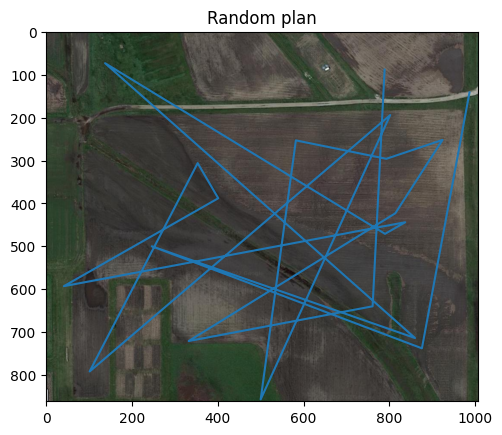

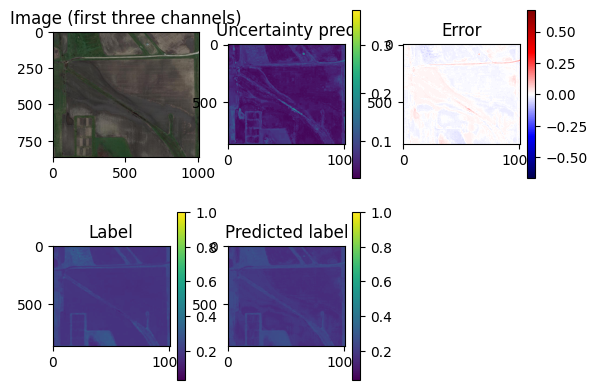

Running safeforest_gmap dataset


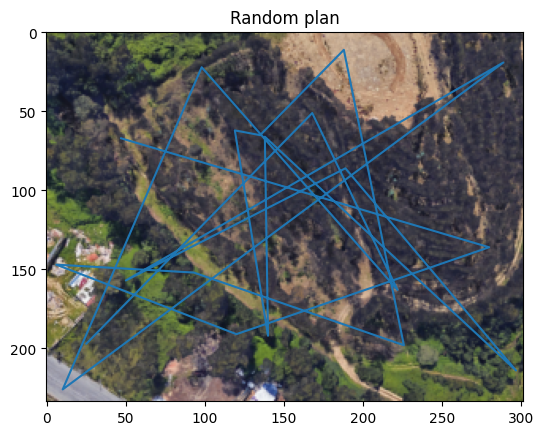

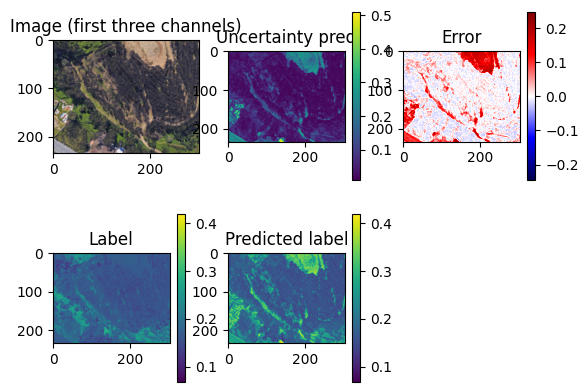

Running safeforest_ortho dataset


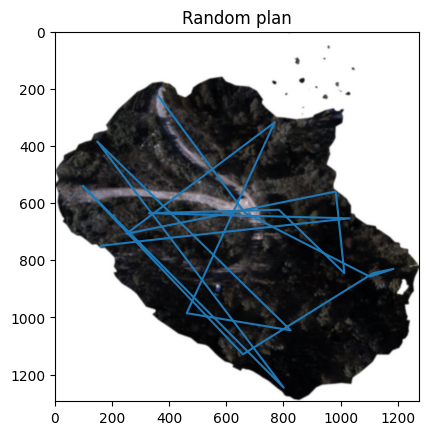

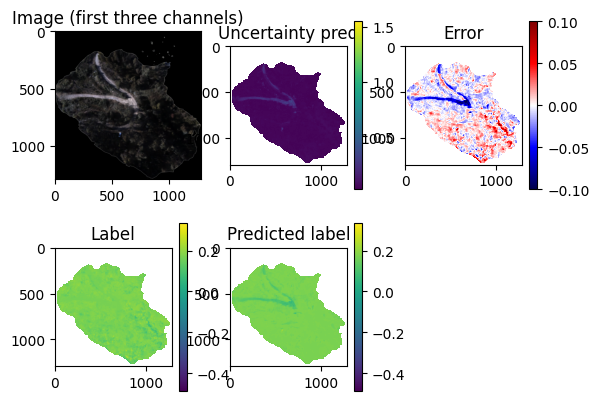

Running yellowcat dataset


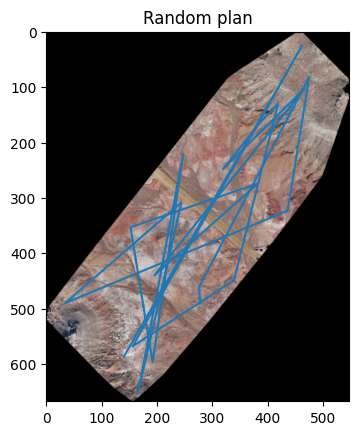

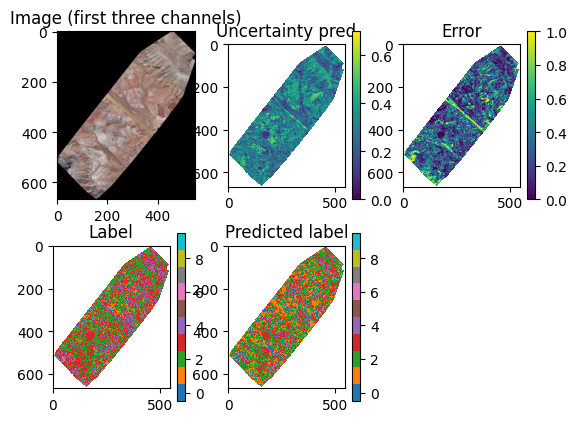

Running chesapeake dataset
Using downloaded and verified file: /home/frc-ag-1/dev/research/informative-path-planning-toolkit/ipp_toolkit/../data/torchgeo/naip/m_3807511_ne_18_060_20181104.tif
Using downloaded and verified file: /home/frc-ag-1/dev/research/informative-path-planning-toolkit/ipp_toolkit/../data/torchgeo/naip/m_3807511_se_18_060_20181104.tif
Using downloaded and verified file: /home/frc-ag-1/dev/research/informative-path-planning-toolkit/ipp_toolkit/../data/torchgeo/naip/m_3807512_nw_18_060_20180815.tif
Using downloaded and verified file: /home/frc-ag-1/dev/research/informative-path-planning-toolkit/ipp_toolkit/../data/torchgeo/naip/m_3807512_sw_18_060_20180815.tif


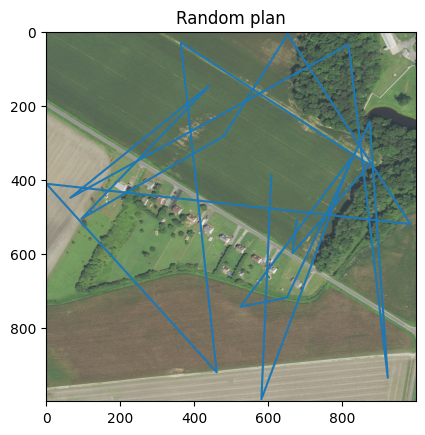

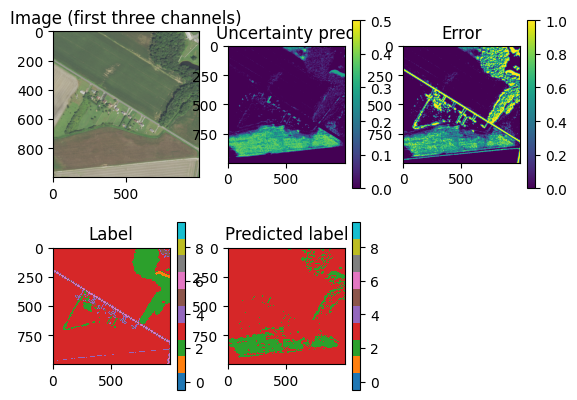

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Running coral dataset


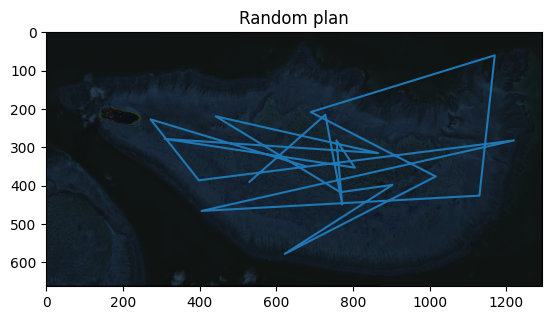

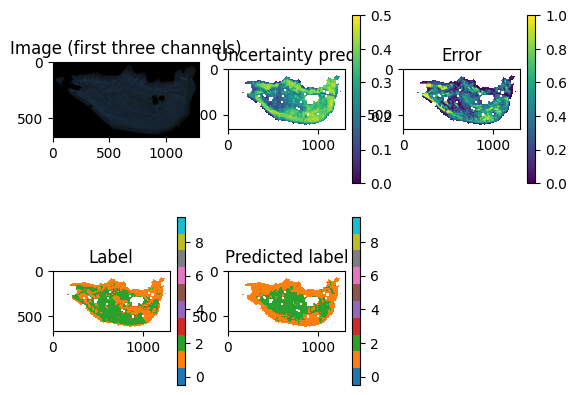

In [2]:
# The number of training samples to observe
N_SAMPLES = 20
for name, dataset_class in ALL_LABELED_DOMAIN_DATASETS.items():
    print(f"Running {name} dataset")
    # Create the data manager
    data = dataset_class()
    # Define a prediction model based on the type of task
    model = MLPClassifier(max_iter=10000) if data.is_classification_dataset() else MLPRegressor()
    # Create a planner based on the data
    planner = RandomMaskedPlanner(data)
    # Create a predictor to generate predictions on this dataset
    predictor = EnsambledMaskedLabeledImagePredictor(
        data, prediction_model=model, n_ensamble_models=10, classification_task=data.is_classification_dataset()
    )
    # Get a random plan
    plan = planner.plan(20, vis=True)
    # Sample values from the environment
    values = data.sample_batch(plan)
    # Fit the model
    predictor.update_model(plan, values)
    # Generate predictions for both the label and the label unceratainty
    prediction = predictor.predict_values_and_uncertainty()
    # Visualize these predictions alongside the ground truth
    visualize_prediction(data, prediction, predictor)